In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image
from matplotlib.ticker import FormatStrFormatter

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import sys
# sys.path.append("ProcessModelResults/")
# from my_functions import *

In [3]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [4]:
# # Catchment boundaries
# lindyke_gdf = gpd.read_file('/nfs/a161/PhD/FloodModelling/LinDykeModels/Model_IdealisedProfiles/CatchmentLinDyke_exported.shp')
# wykebeck_gdf = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/WykeBeckCatchment.shp')
# # Watercourses (for whole country)
# watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')
# # Boundary of whole city, for centering map
# leeds_gdf =  gpd.read_file('../../../FloodModelling/ExtraData/LeedsBoundary/LeedsCatchments.shp')
# # Profile lines
# profileLines_LD = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/Features/Profile Lines.shp')
# profileLines_WB = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/Features/Profile Lines.shp')

# # fig, ax = plt.subplots(figsize=(24, 10))
# # #plt.rcParams['figure.dpi']=1200 
# # leeds_gdf.plot(ax=ax, facecolor="none", linewidth=0.01, edgecolor ='black')
# # for catchment_gdf in [wykebeck_gdf, lindyke_gdf]:
# #     catchment_gdf.plot(ax=ax, facecolor="none", linewidth=1, edgecolor ='black')
# #     # get watercourses just for this catchment
# #     watercourses_clip = gpd.clip(watercourses, catchment_gdf)
# #     watercourses_clip.plot(ax=ax, linewidth=1)
# #     # add basemap
# #     ax.axis('off');

# # profileLines_LD.plot(ax=ax, linewidth=3, color='red') 
# # profileLines_WB.plot(ax=ax, linewidth=3, color='red') 
# # cx.add_basemap(ax, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=12)    
# # # fig.savefig("FigsForPaper/Catchments.png",bbox_inches='tight', dpi=1200)
# # # fig.savefig("Figs/CatchmentLocations/Catchments_lowres.png",bbox_inches='tight')
# # plt.close()

In [5]:
# # Opens a image in RGB mode
# im = Image.open("FigsForPaper/Catchments.png")#.convert('L')
 
# #Image.crop(left, top, right, bottom)    
# left = 260
# top = 260
# right = 840
# bottom = 640
   
# im = im.crop((left, top, right, bottom)) 
# im.save("FigsForPaper/Catchments_test.png",bbox_inches='tight', dpi=1200)    

## Plot profiles (idealised and observed) - for Lin Dyke (but they will be v similar in both cases)

In [6]:
catchment_name = 'LinDyke'

In [7]:
feh_profile = pd.read_csv("../CreateSyntheticRainfallEvents/FEHProfiles/LinDyke/6hr_100yrRP/PreLossRemoval/6hr_100yrRP_6.01h_1mintimestep.csv".format(catchment_name))

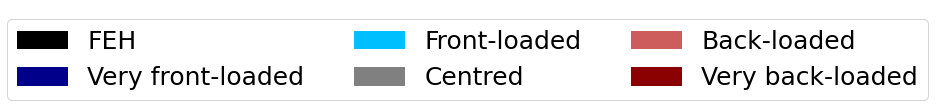

In [8]:
# set up figure instance
fig, axs = plt.subplots(figsize=(3,1))
##############
colors_leg = ['black', 'darkblue', 'deepskyblue','grey', 'indianred', 'darkred']
texts = ['FEH', 'Very front-loaded','Front-loaded','Centred', 'Back-loaded', 'Very back-loaded'] 
patches = [ mpatches.Patch(color=colors_leg[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=3, prop={'size': 25});

# Setting the values for all axes.
axs.axis('off')

##############
# Save figure
##############
# fig.savefig("Figs/Profiles/Idealised_Observed_Profiles_{}.png".format(catchment_name),bbox_inches='tight')  
fig.savefig("Figs/Profiles/legend.png",bbox_inches='tight')   

In [9]:
# test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})

In [10]:
method = '6h_sp_bl_0.9'
idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))

In [11]:
method = '6h_sp_bl_0.6'

for method in methods_dict['Idealised']:
    idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
    print(idealised_profile['Rainfall'].sum())
    post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
    print(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].sum())

59.289999999999985
14.439778525000001
59.28999999999999
14.439778558
59.28999999999999
14.439778554
59.28999999999999
14.439778552999998
59.28999999999999
14.439778555
59.28999999999999
14.439778556
59.28999999999999
14.439778555428337
59.28999999999999
14.439778561
59.289999999999985
14.439778564


In [12]:
# method = '6h_sp_fl_0.1'
# idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
# print(idealised_profile['Rainfall'].sum())
# post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
# print(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].sum())

In [13]:
# method = '6h_sp_bl_0.9'
# idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
# plt.plot(idealised_profile['Rainfall'])
# method = '6h_sp_fl_0.1'
# idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
# post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
# plt.plot(idealised_profile['Rainfall'])

In [14]:
# plt.plot(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'])
# method = '6h_sp_fl_0.1'
# post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
# plt.plot(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'])

In [15]:
# method = '6h_sp_bl_0.9'
# idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
# print(idealised_profile['Rainfall'].sum())
# post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
# print(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].sum())

In [16]:
# The rainfall left after loss removal, as a proportion of the rainfall before. 

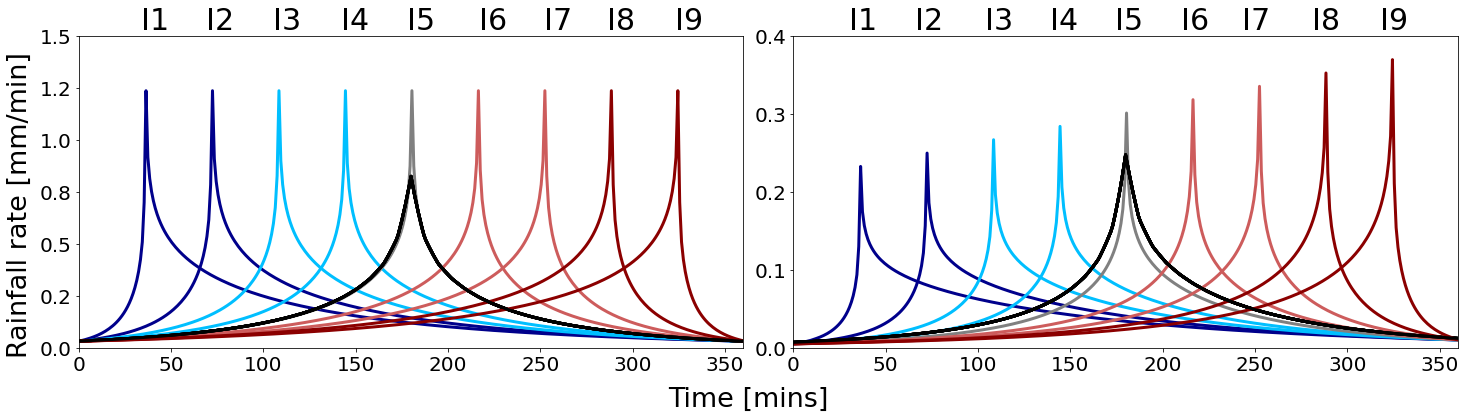

In [17]:
# Set up colours
colors_obs = ["darkblue","indianred","deepskyblue","darkred","darkred","grey","darkred","darkblue","grey","deepskyblue","deepskyblue","indianred","grey","indianred","darkblue"]
colors_idealised = ['darkblue']*2 + ['deepskyblue']*2 + ['grey']+ ['indianred']*2+['darkred']*2
colors_ls = {'Observed': colors_obs, 'Idealised': colors_idealised}

# set up figure instance
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(20,5), sharey=False)

for axes_number, method in enumerate(methods_dict['Idealised']):
    # Read in data
    idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
    axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
    # Add FEh profile
    axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
            linestyle = 'solid') 
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    #axs[0].set_ylim(-0.05,1.35)  
    axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ymin, ymax = plt.ylim()
    
    post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
    axs[1].plot(np.array(range(361))+0.5,post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'], color=colors_idealised[axes_number], linewidth = 3)   
#     axs[1].set_xlabel('Time [mins]')
#     axs[1].set_ylabel('Rainfall rate [mm/min]')
#     axs[1].set_title('Rainfall rate [mm/min] post loss removal')
    axs[1].plot(range(0,361), feh_profile['Total net rain mm (100 year) - urbanised model'][:361], color = 'black', linewidth=3,
        linestyle = 'solid') 
#     axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs[1].tick_params(axis='both', which='major', labelsize=20)
    
fig.text(0.5, -0.06, 'Time [mins]', ha='center', fontsize = 27)
fig.text(-0.015, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 27)

fig.tight_layout() 

custom_xlim = (0, 360)
custom_ylim = (-0, 1.5)

# Setting the values for all axes.
plt.setp(axs[0], xlim=custom_xlim, ylim=custom_ylim)
plt.setp(axs[1], xlim=custom_xlim, ylim=(0,0.4))
# axs.axis('off')

axs[0].annotate('I1', xy=(34, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I2', xy=(69, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I3', xy=(105, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I4', xy=(142,1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I5', xy=(178, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I6', xy=(217,1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I7', xy=(252, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I8', xy=(286, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I9', xy=(323, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)

axs[1].annotate('I1', xy=(30, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I2', xy=(66, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I3', xy=(104, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I4', xy=(139, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I5', xy=(174, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I6', xy=(210, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I7', xy=(243, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I8', xy=(281, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I9', xy=(318, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)

##############
# Save figure
##############
fig.savefig("Figs/Profiles/Idealised_Profiles_{}_pre_and_post_lossremoval.png".format(catchment_name),bbox_inches='tight')  


[0.0, 360.0, 0.0, 1.6, 0.0, 360.0, 0.0, 1.6]

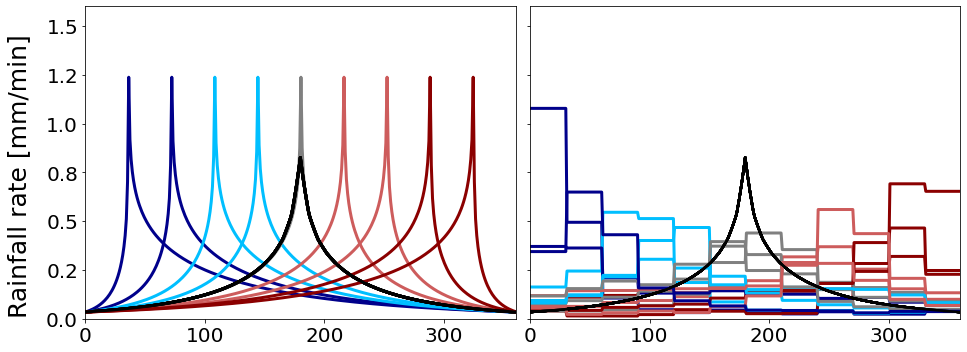

In [18]:
# Set up colours
colors_obs = ["darkblue","indianred","deepskyblue","darkred","darkred","grey","darkred","darkblue","grey","deepskyblue","deepskyblue","indianred","grey","indianred","darkblue"]
colors_idealised = ['darkblue']*2 + ['deepskyblue']*2 + ['grey']+ ['indianred']*2+['darkred']*2
colors_ls = {'Observed': colors_obs, 'Idealised': colors_idealised}

# set up figure instance
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(13,5), sharey=True)

for axes_number, method in enumerate(methods_dict['Idealised']):
    # Read in data
    idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
    axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
    # Add FEh profile
    axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
            linestyle = 'solid') 
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    #axs[0].set_ylim(-0.05,1.35)  
    axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
for cluster_number in range(1,16):
    # Read in pre and post loss removal data
    observed_profile = pd.read_csv('../CreateSyntheticRainfallEvents/ObservedProfiles/{}/6hr_100yrRP/PreLossRemoval/cluster{}.csv'.format(catchment_name, cluster_number), names = ['Time', 'Rainfall'])
#     test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})
    axs[1].plot(observed_profile['Time'],observed_profile['Rainfall'], color=colors_obs[cluster_number-1], linewidth = 3)   
    #axs[1].set_ylim(-0.05,1.35)    
    axs[1].tick_params(axis='both', which='major', labelsize=20)
    
    # loop through tickers and axes
    axs[1].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=2.5, linestyle = 'solid')

# fig.text(0.5, -0.05, 'Time [mins]', ha='center', fontsize = 25)
fig.text(-0.03, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 25)

fig.tight_layout() 

custom_xlim = (0, 360)
custom_ylim = (-0, 1.6)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
# axs.axis('off')

##############
# Save figure
##############
# fig.savefig("Figs/Profiles/Idealised_Observed_Profiles_{}_prelossremoval.png".format(catchment_name),bbox_inches='tight')  


## Find flooded extent stats

In [19]:
cluster_results_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/allclusters_summary_notwetlands.csv",
                                  keep_default_na=False)
cluster_results_ip_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/allclusters_summary_export.csv",
                                  keep_default_na=False)
cluster_results_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/allclusters_summary_notwetlands.csv",
                                  keep_default_na=False)
cluster_results_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/allclusters_summary_export.csv",
                                  keep_default_na=False)

In [20]:
def find_diff_in_flooded_area(cluster_results, most_fl_str, most_bl_str, flooded_area_col):
    most_front_loaded_flooded_area = cluster_results[cluster_results['Cluster_num']==most_fl_str][flooded_area_col].values[0]
    most_back_loaded_flooded_area = cluster_results[cluster_results['Cluster_num']==most_bl_str][flooded_area_col].values[0]
    print(round(most_back_loaded_flooded_area - most_front_loaded_flooded_area, 3), "km2")
    print(((float(most_back_loaded_flooded_area)-most_front_loaded_flooded_area)/most_front_loaded_flooded_area)*100)

print('Idealised, Lin Dyke')
find_diff_in_flooded_area(cluster_results_ip_ld, 'FL1', 'BL9', 'FloodedArea')   
print('Idealised, Wyke Beck')
find_diff_in_flooded_area(cluster_results_ip_wb, 'FL1', 'BL9', 'FloodedArea')       
    
print('Observed, Lin Dyke')
find_diff_in_flooded_area(cluster_results_op_ld, '6h_c8', '6h_c5', 'FloodedArea')
print('Observed, Wyke Beck')
find_diff_in_flooded_area(cluster_results_op_wb, '6h_c8', '6h_c5','FloodedArea')   

Idealised, Lin Dyke
0.142 km2
15.139178993136959
Idealised, Wyke Beck
0.338 km2
13.133877154091003
Observed, Lin Dyke
0.222 km2
24.671771516273807
Observed, Wyke Beck
0.613 km2
23.645779980129475


## Plot flooded extent

In [21]:
cluster_results_ip_ld['Cluster_num'] = ['I1','I2','I3','I4','I5','I6','I7','I8','I9',]
cluster_results_ip_wb['Cluster_num'] = ['I1','I2','I3','I4','I5','I6','I7','I8','I9',]
cluster_results_op_ld['Cluster_num'] = ['FEH', 'O1','O8','O15','O3','O11','O10','O9','O13','O6','O2','O12','O14','O4','O7','O5',]
cluster_results_op_wb['Cluster_num'] = ['FEH', 'O1','O8','O15','O3','O11','O10','O9','O13','O6','O2','O12','O14','O4','O7','O5',]

In [22]:
cluster_results_ld_ls = [cluster_results_ip_ld,cluster_results_op_ld]
cluster_results_wb_ls = [cluster_results_ip_wb,cluster_results_op_wb]

cluster_results_ip_ls = [cluster_results_ip_ld,cluster_results_ip_wb]
cluster_results_op_ls = [cluster_results_op_ld,cluster_results_op_wb]

catchment_name_ls = ['LinDyke','WykeBeck', 'LinDyke','WykeBeck']
cluster_results_ls_ls = [cluster_results_ip_ls, cluster_results_op_ls]

### Create separate legend (to add to plots in Overleaf)

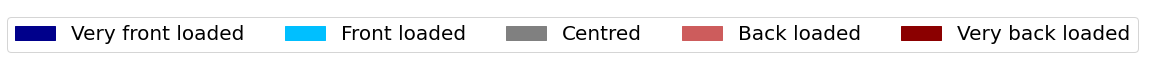

In [23]:
colors = {'Very front loaded':'darkblue', 'Front loaded':'deepskyblue',
         'Centred': 'grey', 'Back loaded': 'indianred', 'Very back loaded':'darkred'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
fig, ax = plt.subplots(figsize = (5,0.1), gridspec_kw={'hspace': 0.2, 'wspace': 0.03})
ax.legend(handles, labels, ncol=5, fontsize=20)
plt.axis('off')
fig.savefig("Figs/FloodedAreaBarCharts/legend.PNG", bbox_inches='tight')

In [24]:
def plot_flooded_extent_2catchments(cluster_results_ls, urban_str, catchment_name, catchment_name_short,  ylim, percent_adjusts,
                                   label_height_adjusters, title = True):
    
    fig, axs = plt.subplots(ncols= 2, nrows=1, sharey=True,figsize = (10,4), gridspec_kw={'hspace': 0.2, 'wspace': 0.03})
    profile_name_ls = ['Idealised','Observed']
    
    ##############################
    # Plot number of flooded cells
    ##############################
    for number, ax in enumerate(axs.flatten()):

        cluster_results =  cluster_results_ls[number]
        cluster_results = cluster_results.replace(to_replace='paleturquoise', value='deepskyblue', regex=True)

        
        y_pos = np.arange(len(cluster_results['Cluster_num']))
        ax.bar(y_pos, cluster_results['{}FloodedArea'.format(urban_str)].values.tolist(), width = 0.9, 
               color = cluster_results['colour'])
        # Create names on the x-axis
        ax.set_xticks(y_pos)
        if number == 0:
            rotation = 0
        else:
            rotation = 75
        ax.set_xticklabels(cluster_results['Cluster_num'], fontsize =10, rotation = rotation)
        ax.tick_params(axis='both', which='major', labelsize=12.5)
        xlocs, xlabs = plt.xticks(y_pos)
        xlocs=[i+1 for i in range(0,19)]
        xlabs=[i/2 for i in range(0,19)]
                  
        for i, v in enumerate(cluster_results['{}FloodedArea'.format(urban_str)].values.tolist()):
            ax.text(xlocs[i] - percent_adjusts[number], v * label_height_adjusters[number], 
                    str(cluster_results["%Diff_{}FloodedArea_fromSP_formatted".format(urban_str)][i]), 
                        fontsize = 14, rotation =90)
        
        if urban_str == '':
            ax.set_ylim(1,ylim)
        else :
            ax.set_ylim(0,ylim)
        
        if title ==True:
            ax.set_title(profile_name_ls[number],fontsize=15)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    fig.text(0.06, 0.5, 'Flooded area (km2)', fontsize=15, va='center', rotation='vertical')   
    if title == True:
        fig.suptitle(catchment_name, x =0.5, y= 1.07, fontsize=20)
    
#     if urban_str != '':
#         urban_str = '_' + urban_str
    
    # Save
    fig.savefig("Figs/FloodedAreaBarCharts/{}_{}.PNG".format(catchment_name_short, urban_str), bbox_inches='tight')
    

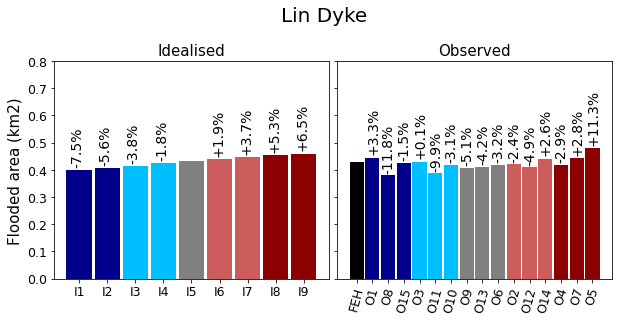

In [25]:
plot_flooded_extent_2catchments(cluster_results_ld_ls, 'Urban', 'Lin Dyke','LD',ylim =0.8, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.3, 1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.05, 1.05])

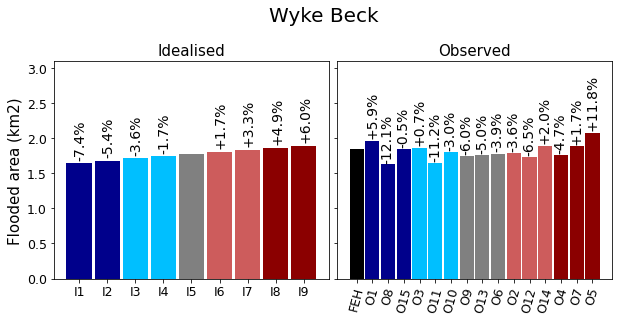

In [26]:
plot_flooded_extent_2catchments(cluster_results_wb_ls, 'Urban', 'Wyke Beck','WB',ylim =3.1, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.2, 1.47], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.05, 1.04])

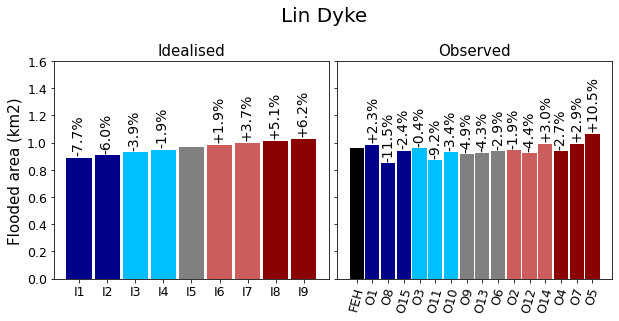

In [27]:
plot_flooded_extent_2catchments(cluster_results_ld_ls, 'Notwater', 'Lin Dyke','LD',ylim =1.6, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.29, 1.46], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.04, 1.04])

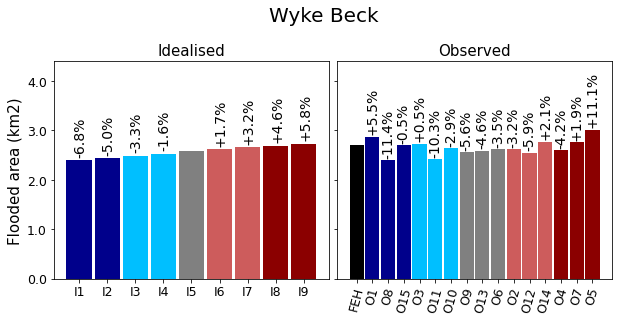

In [28]:
plot_flooded_extent_2catchments(cluster_results_wb_ls, 'Notwater', 'Wyke Beck','WB',ylim =4.4, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.2, 1.45], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.05, 1.04])

In [29]:
# plot_flooded_extent_2catchments(cluster_results_ip_ls, '', 'Idealised','IP',ylim = 2.1, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjusts = [1.2, 1.45], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters = [1.02, 1.015])

In [30]:
# plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, '', 'Idealised','IP',ylim = 3.9, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjustments = [1.3,1.4], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters_x = [1.03, 1.02], 
#                                 # Left = idealised, WB, right = WB, observed
#                                 label_height_adjusters_y = [1.02,1.02], set_title=True)

In [31]:
# plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Urban', 'Idealised','IP',ylim = 2.7, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjustments = [1.2,1.4], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters_x = [1.1, 1.1], 
#                                 # Left = idealised, WB, right = WB, observed
#                                 label_height_adjusters_y = [1.04,1.03])

In [32]:
# plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Notwater', 'Idealised','IP',ylim = 3.9, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjustments = [1.2,1.4], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters_x = [1.07, 1.06], 
#                                 # Left = idealised, WB, right = WB, observed
#                                 label_height_adjusters_y = [1.03,1.04])

## Plot Flood Severity

In [33]:
individual_cell_values_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/individual_cell_values_notwetlands.csv")
individual_cell_values_ip_wb=pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/individual_cell_values_notwetlands.csv")
individual_cell_values_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/individual_cell_values_notwetlands.csv")
individual_cell_values_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/individual_cell_values_notwetlands.csv")

In [34]:
di_i = {"6h_sp_bl_0.9": "I9", "6h_sp_fl_0.1": "I1"}
di_o = {"6h_c5": "O5", "6h_c8": "O8"}

individual_cell_values_ip_ld.replace({"short_id": di_i},inplace=True)
individual_cell_values_ip_wb.replace({"short_id": di_i},inplace=True)
individual_cell_values_op_ld.replace({"short_id": di_o},inplace=True)
individual_cell_values_op_wb.replace({"short_id": di_o},inplace=True)

In [35]:
# individual_cell_values_ip = [individual_cell_values_ip_ld,individual_cell_values_ip_wb]
# individual_cell_values_op = [individual_cell_values_op_ld,individual_cell_values_op_wb]
# individual_cell_values_sps = [individual_cell_values_sps_ld,individual_cell_values_sps_wb]

individual_cell_values_ip_dict = {'LinDyke': individual_cell_values_ip_ld,
                             'WykeBeck': individual_cell_values_ip_wb}
individual_cell_values_op_dict = {'LinDyke': individual_cell_values_op_ld,
                             'WykeBeck': individual_cell_values_op_wb}

### Plot histograms

In [36]:
# df_idealised = plot_histogram_weighted(individual_cell_values_ip_dict, 'Idealised','IP','6h_sp_fl_0.1', '6h_sp_bl_0.9', 
#                                        filter_out_water = False, title= True)

In [37]:
# df_idealised_nowater = plot_histogram_weighted(individual_cell_values_ip_dict, 'Idealised','IP','I1', 
#                                                'I9', filter_out_water = True,title= True)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so resul

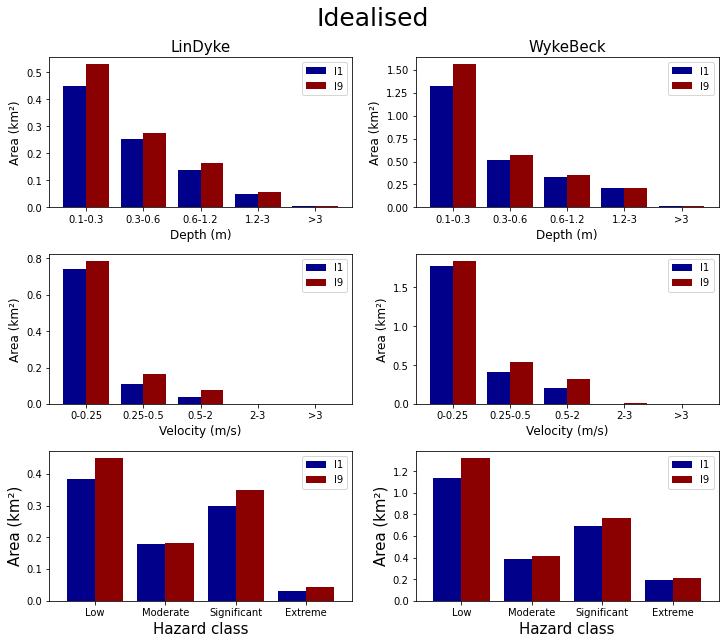

In [38]:
def depth_hazard_plot_ax(individual_cell_values_dict, profiles_name, profiles_name_short, 
                         smallest_method_str, largest_method_str, filter_out_water, ax_ld, ax_wb, title=True):
    # Define bins and labels for Depth
    depth_bins = [0.1, 0.3, 0.6, 1.2, 3]  # Depth bin edges
    depth_labels = [f'{i}-{j}' for i, j in zip(depth_bins[:-1], depth_bins[1:])] + ['>3']
    
    catchments = ['LinDyke', 'WykeBeck']
    axs = [ax_ld, ax_wb]
    
    for catchment_name, ax in zip(catchments, axs):
        if catchment_name == "LinDyke":
            cell_size_in_m2 = 1
        elif catchment_name == "WykeBeck":
            cell_size_in_m2 = 4

        individual_cell_values = individual_cell_values_dict[catchment_name]

        if filter_out_water:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class'] == 15]

        # Bin Depth values
        individual_cell_values['Depth_cat'] = pd.cut(individual_cell_values['Depth'], 
                                                     bins=depth_bins + [np.inf], 
                                                     labels=depth_labels, 
                                                     right=False)

        largest_method = individual_cell_values[individual_cell_values['short_id'] == largest_method_str]
        smallest_method = individual_cell_values[individual_cell_values['short_id'] == smallest_method_str]

        largest_method_val = largest_method['Depth_cat'].value_counts(sort=False).reindex(depth_labels, fill_value=0)
        smallest_method_val = smallest_method['Depth_cat'].value_counts(sort=False).reindex(depth_labels, fill_value=0)

        largest_method_val = largest_method_val * (cell_size_in_m2 / 1000000)
        smallest_method_val = smallest_method_val * (cell_size_in_m2 / 1000000)

        depth_cats = pd.DataFrame({
            'Depth_cat': depth_labels,
            smallest_method_str: smallest_method_val.values,
            largest_method_str: largest_method_val.values
        })

        depth_cats.set_index('Depth_cat').plot.bar(ax=ax, rot=0, width=0.8, color=['darkblue', 'darkred'])
        
        if title:
            ax.set_title(catchment_name, fontsize=15)
        ax.set_ylabel("Area (km²)", fontsize = 12)
        ax.set_xlabel('Depth (m)', fontsize = 12)


def velocity_hazard_plot_ax(individual_cell_values_dict, profiles_name, profiles_name_short, 
                            smallest_method_str, largest_method_str, filter_out_water, ax_ld, ax_wb, title=True):
    velocity_bins = [0, 0.25, 0.5, 2, 3]  # Velocity bin edges
    velocity_labels = [f'{i}-{j}' for i, j in zip(velocity_bins[:-1], velocity_bins[1:])] + ['>3']

    catchments = ['LinDyke', 'WykeBeck']
    axs = [ax_ld, ax_wb]

    for catchment_name, ax in zip(catchments, axs):
        if catchment_name == "LinDyke":
            cell_size_in_m2 = 1
        elif catchment_name == "WykeBeck":
            cell_size_in_m2 = 4

        individual_cell_values = individual_cell_values_dict[catchment_name]

        if filter_out_water:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class'] == 15]

        individual_cell_values['Velocity_cat'] = pd.cut(individual_cell_values['Velocity'], 
                                                        bins=velocity_bins + [np.inf], 
                                                        labels=velocity_labels, 
                                                        right=False)

        largest_method = individual_cell_values[individual_cell_values['short_id'] == largest_method_str]
        smallest_method = individual_cell_values[individual_cell_values['short_id'] == smallest_method_str]

        largest_method_val = largest_method['Velocity_cat'].value_counts(sort=False).reindex(velocity_labels, fill_value=0)
        smallest_method_val = smallest_method['Velocity_cat'].value_counts(sort=False).reindex(velocity_labels, fill_value=0)

        largest_method_val = largest_method_val * (cell_size_in_m2 / 1000000)
        smallest_method_val = smallest_method_val * (cell_size_in_m2 / 1000000)

        velocity_cats = pd.DataFrame({
            'Velocity_cat': velocity_labels,
            smallest_method_str: smallest_method_val.values,
            largest_method_str: largest_method_val.values
        })

        velocity_cats.set_index('Velocity_cat').plot.bar(ax=ax, rot=0, width=0.8, color=['darkblue', 'darkred'])
        
        if title:
            ax.set_title(catchment_name, fontsize=15)
        ax.set_ylabel("Area (km²)", fontsize = 12)
        ax.set_xlabel('Velocity (m/s)', fontsize = 12)

    
def hazard_plot_ax(individual_cell_values_dict, profiles_name, profiles_name_short, 
                   smallest_method_str, largest_method_str, filter_out_water, ax_ld, ax_wb, title=True):
    hazard_labels = ['Low', 'Moderate', 'Significant', 'Extreme']

    catchments = ['LinDyke', 'WykeBeck']
    axs = [ax_ld, ax_wb]

    for catchment_name, ax in zip(catchments, axs):
        if catchment_name == "LinDyke":
            cell_size_in_m2 = 1
        elif catchment_name == "WykeBeck":
            cell_size_in_m2 = 4

        individual_cell_values = individual_cell_values_dict[catchment_name]

        if filter_out_water:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class'] == 15]

        largest_method = individual_cell_values[individual_cell_values['short_id'] == largest_method_str]
        smallest_method = individual_cell_values[individual_cell_values['short_id'] == smallest_method_str]

        largest_method_val = np.unique(largest_method['Hazard'], return_counts=True)[1]
        smallest_method_val = np.unique(smallest_method['Hazard'], return_counts=True)[1]

        largest_method_val = largest_method_val * (cell_size_in_m2 / 1000000)
        smallest_method_val = smallest_method_val * (cell_size_in_m2 / 1000000)

        hazard_cats = pd.DataFrame({
            'Hazard_cat': hazard_labels,
            smallest_method_str: smallest_method_val,
            largest_method_str: largest_method_val
        })

        hazard_cats.set_index('Hazard_cat').plot.bar(ax=ax, rot=0, width=0.8, color=['darkblue', 'darkred'])

        if title:
            ax.set_title(catchment_name, fontsize=20)
        ax.set_ylabel("Area (km²)", fontsize = 15)
        ax.set_xlabel('Hazard class', fontsize = 15)


# Create a figure with 3 rows and 2 columns for 3 variables (Depth, Velocity, Hazard) and 2 catchments (LinDyke, WykeBeck)
fig, axs = plt.subplots(nrows=3, ncols=2, sharey=False, figsize=(12, 10), gridspec_kw={'hspace': 0.31, 'wspace': 0.21})
fig.suptitle('Idealised', fontsize= 25, y=0.95)

# Depth (first row, both columns)
depth_hazard_plot_ax(individual_cell_values_ip_dict, 'Idealised', 'IP', 'I1', 'I9', filter_out_water=True, 
                     ax_ld=axs[0, 0], ax_wb=axs[0, 1])

# Velocity (second row, both columns)
velocity_hazard_plot_ax(individual_cell_values_ip_dict, 'Idealised', 'IP', 'I1', 'I9', filter_out_water=True, 
                        ax_ld=axs[1, 0], ax_wb=axs[1, 1], title=False)

# Hazard (third row, both columns)
hazard_plot_ax(individual_cell_values_ip_dict, 'Idealised', 'IP', 'I1', 'I9', filter_out_water=True, 
               ax_ld=axs[2, 0], ax_wb=axs[2, 1], title=False)

# for ax in axs[1].flatten():
#     ax.tick_params(axis='x', labelsize=12, rotation = 45)  # Set x-tick label size
#     ax.tick_params(axis='y', labelsize=12)  # Set y-tick label size

# Show the figure
plt.tight_layout()
plt.show()


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so result

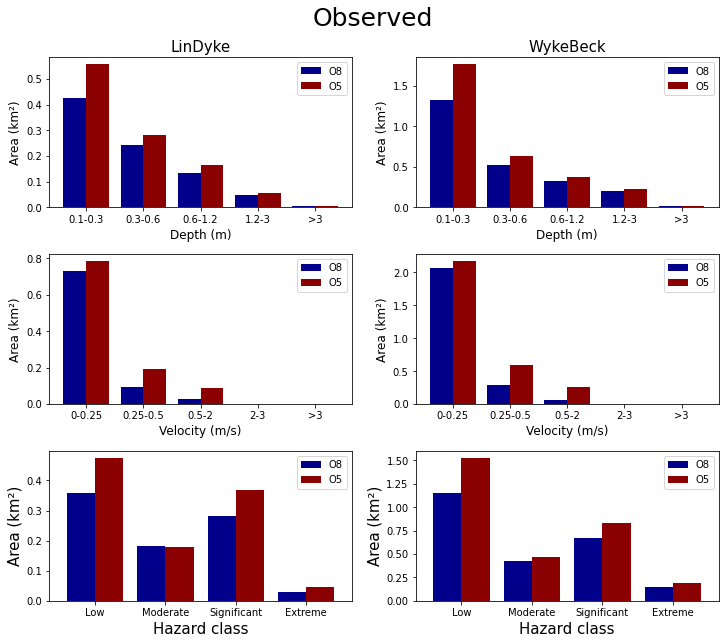

In [39]:
# Create a figure with 3 rows and 2 columns for 3 variables (Depth, Velocity, Hazard) and 2 catchments (LinDyke, WykeBeck)
fig, axs = plt.subplots(nrows=3, ncols=2, sharey=False, figsize=(12, 10), gridspec_kw={'hspace': 0.31, 'wspace': 0.21})
fig.suptitle('Observed', fontsize= 25, y=0.95)

# Depth (first row, both columns)
depth_hazard_plot_ax(individual_cell_values_op_dict,  'Observed', 'OP','O8', 'O5', filter_out_water=True, 
                     ax_ld=axs[0, 0], ax_wb=axs[0, 1])

# Velocity (second row, both columns)
velocity_hazard_plot_ax(individual_cell_values_op_dict, 'Observed', 'OP','O8', 'O5',filter_out_water=True, 
                        ax_ld=axs[1, 0], ax_wb=axs[1, 1], title=False)

# Hazard (third row, both columns)
hazard_plot_ax(individual_cell_values_op_dict, 'Observed', 'OP','O8', 'O5',filter_out_water=True, 
               ax_ld=axs[2, 0], ax_wb=axs[2, 1], title=False)

# Show the figure
plt.tight_layout()
plt.show()


In [38]:
df_depth_nowater =  find_numbers_in_bins(df_idealised_nowater, df_observed_nowater, 'NotwaterFloodedArea', 0, 1)
df_depth_nowater

label,0.1-0.3m,0.3-0.6m,0.6-1.2m,1.2-3m,>3m,TotalDiffBetweenExtremes_fromthisDF,TotalDiffBetweenExtremes_fromClusterResults
LD_Idealised,0.079,0.023,0.026,0.006,0.0001,0.1341,0.134
LD_Observed,0.132,0.038,0.033,0.009,-0.0001,0.2119,0.212
WB_Idealised,0.232,0.057,0.025,0.008,0.0002,0.3222,0.323
WB_Observed,0.435,0.112,0.045,0.017,-0.0001,0.6089,0.610
LD_Idealised_%,59.000,17.000,19.000,4.000,0.0000,100.0000,100.000
LD_Observed_%,62.000,18.000,16.000,4.000,-0.0000,100.0000,100.000
WB_Idealised_%,72.000,18.000,8.000,2.000,0.0000,100.0000,100.000
WB_Observed_%,71.000,18.000,7.000,3.000,-0.0000,100.0000,100.000


In [39]:
df_velocity_nowater =  find_numbers_in_bins(df_idealised_nowater, df_observed_nowater, 'NotwaterFloodedArea', 2, 3)
df_velocity_nowater#.to_csv("test.csv")

label,0.0-0.25m/s,0.25-0.5m/s,0.5-2.0m/s,2.0-3.0m/s,>3m/s,TotalDiffBetweenExtremes_fromthisDF,TotalDiffBetweenExtremes_fromClusterResults
LD_Idealised,0.043,0.053,0.039,0.000,0.0000,0.1350,0.134
LD_Observed,0.054,0.100,0.058,0.000,0.0000,0.2120,0.212
WB_Idealised,0.063,0.140,0.117,0.002,0.0005,0.3225,0.323
WB_Observed,0.112,0.302,0.196,0.000,0.0000,0.6100,0.610
LD_Idealised_%,32.000,40.000,29.000,0.000,0.0000,101.0000,100.000
LD_Observed_%,25.000,47.000,27.000,0.000,0.0000,100.0000,100.000
WB_Idealised_%,20.000,43.000,36.000,1.000,0.0000,100.0000,100.000
WB_Observed_%,18.000,50.000,32.000,0.000,0.0000,100.0000,100.000


### Hazard

In [ ]:
hazard_plot(individual_cell_values_ip_dict, 'Idealised', 'IP', 'I1', 'I9', filter_out_water= True)

Figs/HazardPlots/IP_HazardCats_withoutwater.PNG


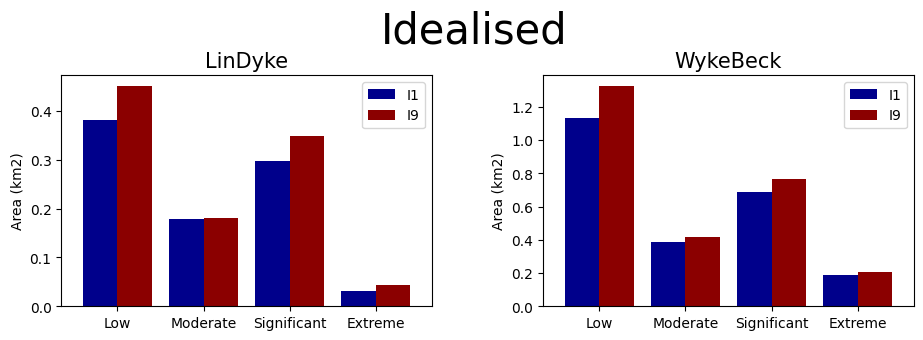

In [96]:
hazard_plot(individual_cell_values_ip_dict, 'Idealised', 'IP', 'I1', 'I9', filter_out_water= True)

In [34]:
# hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','6h_c8', '6h_c5', filter_out_water= False)

Figs/HazardPlots/OP_HazardCats_withoutwater.PNG


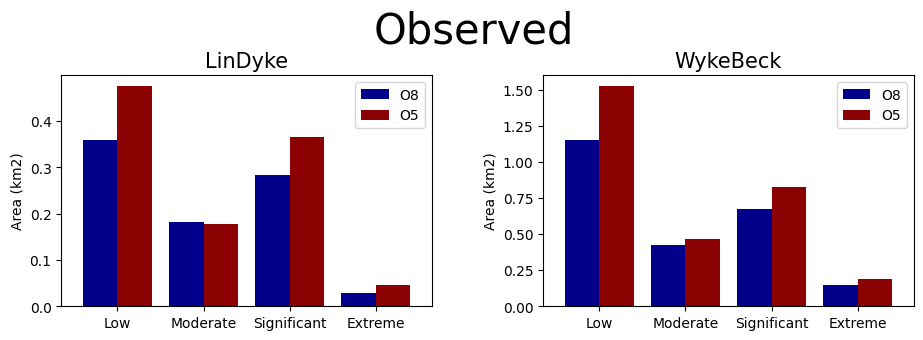

In [97]:
hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','O8', 'O5', filter_out_water= True)

In [ ]:
# hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','O8', 'O5', filter_out_water= False)